# Implemented in NumPy

In [1]:
import numpy as np

# N is batch size: D_in is input dimensions
# H is hidden diemsion, D_out is output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # forward pass, computed predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    
    # backprop to compute gradients of w1 and w2 WRT loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33028537.856874913
1 28614708.47893367
2 28164244.175860047
3 26783138.4669343
4 22541093.90897807
5 15985736.745283537
6 9858856.240513904
7 5609931.807985855
8 3222303.2457141243
9 1982678.751694758
10 1343449.216762004
11 992008.9218462044
12 779791.0815863735
13 638135.7884935556
14 535651.50911355
15 457038.4381455452
16 394123.7756864094
17 342516.4646926223
18 299392.92061108793
19 262992.8145944725
20 232033.83705346385
21 205555.22080498096
22 182713.8892631572
23 162937.05685078516
24 145785.23107090872
25 130809.62874378705
26 117684.37919408832
27 106149.27870006804
28 95969.60649276977
29 86962.57245065545
30 78960.31406703203
31 71841.91802329465
32 65489.66403372906
33 59814.25681577285
34 54730.723030679466
35 50157.72514813965
36 46035.29630915383
37 42311.934890532524
38 38941.831313112074
39 35886.82159969071
40 33111.669997513585
41 30586.895595340313
42 28285.289444378315
43 26184.87281919056
44 24265.494207918517
45 22508.17919842459
46 20897.464609515788
47 194

In [3]:
import torch

dtype = torch.float
device = torch.device('cpu')
device = torch.device('cuda:0')  # uncomment to run on GPU

# N is batch size: D_in is input dimensions
# H is hidden diemsion, D_out is output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# create rnadom input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # forward pass, compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    
    # backgrop to compute gradients of w1 and w2 wrt loss
    g_yp = 2.0 * (y_pred - y)
    g_w2 = h_relu.t().mm(g_yp)
    g_hrelu = g_yp.mm(w2.t())
    g_h = g_hrelu.clone()
    g_h[h < 0] = 0
    g_w1 = x.t().mm(g_h)
    
    # update weights
    w1 -= learning_rate * g_w1
    w2 -= learning_rate * g_w2
    

99 579.759033203125
199 4.6479597091674805
299 0.07774040102958679
399 0.0019172304309904575
499 0.00016533181769773364


## with automatic gradient computation

In [4]:
dtype = torch.float
device = torch.device('cpu')
# device = torch.device('cuda:0')  # uncomment to run on GPU

# N is batch size: D_in is input dimensions
# H is hidden diemsion, D_out is output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# create rnadom input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # forward pass: compute the predicted y using operations on tensors, these are exactly the same operations
    # except we don't need to store the references to intermediate values since we are not implementing the gradient by hand
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # compute and print loss using operations on tensors
    # now, loss is a tensor of shape (1, ). loss.item() gets the scaler value held in the loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    
    # use autograd to compute the backward pass.  This call will compute the gradient of the
    # loss WRT to all tensors with requires_grad=True
    # after this call w1.grad and w2.grad will be tensors holding the gradient of the loss 
    # with respect to w1 and w2 respectively
    loss.backward()
    
    # manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this in autograd
    # an alterative way is to operate on weight.data and weight.grad.data 
    # recall that tensor.data gives a tensor that shares the storage with 
    # the tensor, but doesn't track history. You can also use torch.optim.SGD to achieve this
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        # manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

99 254.42686462402344
199 0.9650717973709106
299 0.00653664767742157
399 0.00018681047367863357
499 3.503056359477341e-05


## Custom autograd functions

In [6]:
import torch

class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd functions by subclassing torch.autograd.Function
    and implementing the forward and backward passes with operate on tensors
    """
    
    @staticmethod
    def forward(ctx, input):
        """
        in the forward pass we recieve a tensor containing the input and return a tensor containing the output. ctx is a context object that
        can be used to stash information for backward computation. You can cache arbitrary objects for use in the backward pass
        using the ctx.save_for_backward method
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_output):
        """
        in the backward pass we recieve a tensor containing the gradient of the loss
        WRT the output, and we need to compute the gradient of the loss WRT the input
        """
        input,  = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # to apply our function, we use function.apply method, alias with relu
    relu = MyReLU.apply
    
    # forward pass: compute predicted y using operations
    y_pred = relu(x.mm(w1)).mm(w2)
    
    # compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

99 300.1382751464844
199 1.1988370418548584
299 0.007517761550843716
399 0.0001823824568418786
499 3.225992259103805e-05


## With the NN module

In [9]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# use the nn package to define our model as a sequence of layers. nn.Sequential is a module with contains other modules,
# and applies them in sequence to produce its output. Each linear module computes output from input using
# a linear function, and holds internal Tensors for its weight and bias
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

# the nn package also contains definitions of popular loss functions, in this
# case we will use MSE 
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a tensor of input data to the module and it produces a tensor of output data
    y_pred = model(x)
    
    # compute and print loss. we pass tensors containing the predicted and tru values of y, 
    # and the loss function returns a tensor containing the loss
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # zero the gradients before running the backwards pass
    model.zero_grad()
    
    # backward pass: compute cardients
    loss.backward()
    
    # update weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    

99 1.9734172821044922
199 0.061511363834142685
299 0.0044335005804896355
399 0.00041291487286798656
499 4.1062026866711676e-05


## PyTorch classifier testing

In [1]:
import sklearn.datasets

X, y = sklearn.datasets.make_moons(200, noise=0.2)

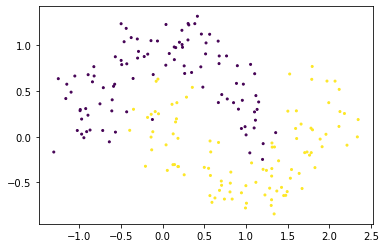

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=4, c=y)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        return x
    
    def predict(self, x):
        pred = F.softmax(self.forward(x), dim=1)
        ans = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [11]:
model = Net()

crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [22]:
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    
    loss = crit(y_pred, y)
    losses.append(loss)
    
    optim.zero_grad()
    loss.backward()
    optim.step()

In [24]:
from sklearn.metrics import accuracy_score

print(accuracy_score(model.predict(X), y))

0.98


In [15]:
def predict(x):
    #Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    #Predict and return ans
    ans = model.predict(x)
    return ans.numpy()

In [16]:
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

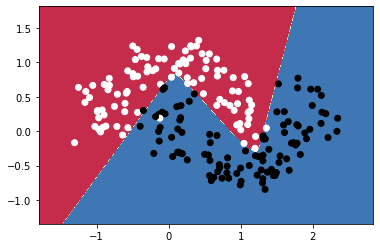

In [23]:
import numpy as np

plot_decision_boundary(lambda x: predict(x), X.numpy(), y.numpy())